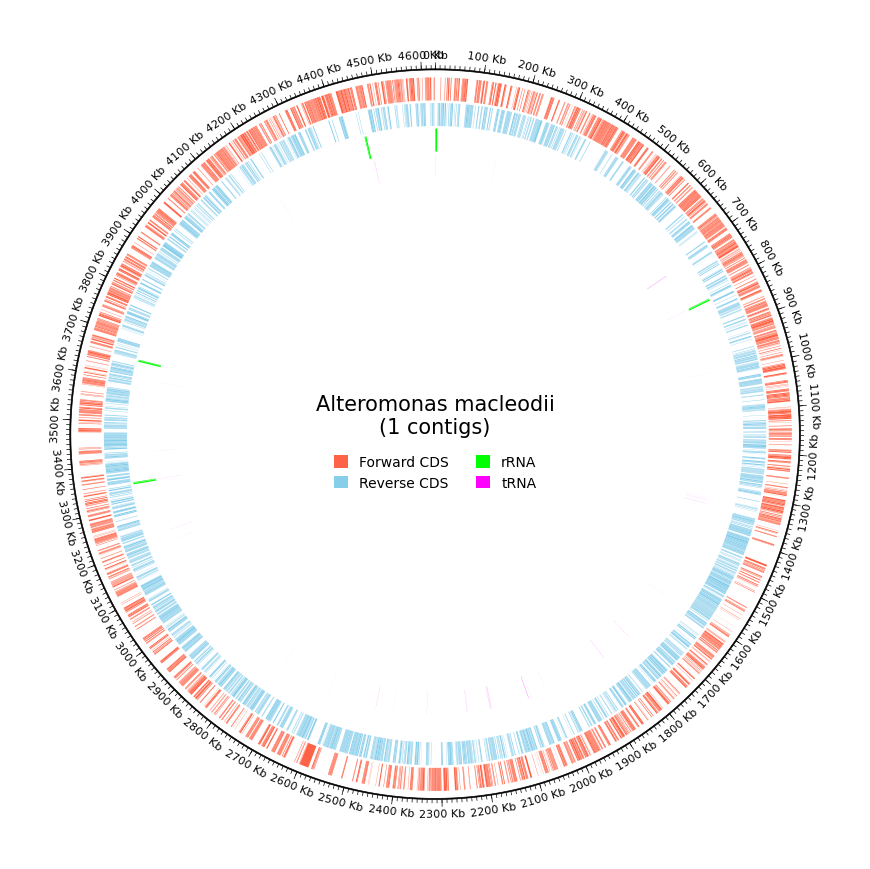

In [2]:
from pycirclize import Circos
from pycirclize.parser import Gff
from matplotlib.patches import Patch

# Load your genome GFF
gff_file = "/projectnb/bf528/students/mmccar53/project1-week3-template-mmccar53-bu/results/annots/genome.gff"
gff = Gff(gff_file)

# Use gff parser to extract contig sizes & features
seqid2size = gff.get_seqid2size()
space = 0 if len(seqid2size) == 1 else 2

# Initialize Circos instance
circos = Circos(seqid2size, space=space)
circos.text(f"Alteromonas macleodii\n({len(circos.sectors)} contigs)", r=5, size=15)

# Extract features
seqid2features = gff.get_seqid2features(feature_type=None)

# Add sectors & tracks
for sector in circos.sectors:
    # Outer axis track
    outer_track = sector.add_track((99.7, 100))
    outer_track.axis(fc="black")

    major_interval = 100000
    minor_interval = int(major_interval / 10)
    if sector.size > minor_interval:
        outer_track.xticks_by_interval(
            major_interval, 
            label_formatter=lambda v: f"{v / 1000:.0f} Kb"
        )
        outer_track.xticks_by_interval(minor_interval, tick_length=1, show_label=False)

    # Create tracks for features
    f_cds_track = sector.add_track((91, 98), r_pad_ratio=0.1)
    r_cds_track = sector.add_track((84, 91), r_pad_ratio=0.1)
    rrna_track = sector.add_track((77, 84), r_pad_ratio=0.1)
    trna_track = sector.add_track((70, 77), r_pad_ratio=0.1)

    # Plot features
    for feature in seqid2features[sector.name]:
        if feature.type == "CDS":
            if feature.location.strand == 1:
                f_cds_track.genomic_features([feature], fc="tomato")
            else:
                r_cds_track.genomic_features([feature], fc="skyblue")
        elif feature.type == "rRNA":
            rrna_track.genomic_features([feature], fc="lime")
        elif feature.type == "tRNA":
            trna_track.genomic_features([feature], fc="magenta")

# Generate plot
fig = circos.plotfig()

# Add legend
_ = circos.ax.legend(
    handles=[
        Patch(color="tomato", label="Forward CDS"),
        Patch(color="skyblue", label="Reverse CDS"),
        Patch(color="lime", label="rRNA"),
        Patch(color="magenta", label="tRNA"),
    ],
    bbox_to_anchor=(0.5, 0.45),
    loc="center",
    ncols=2,
)
